# GENERAL OVERVIEW OF THE PROJECT

This project is one of the task for the ModECI/MDF outreachy intenship perequite for summer 2023 internship. it shows step-by-step tutorial on how to implement pytorch with MDF (Model Description Format). In this tutorial, i will be taking you through step-by-step tutorial on how i built a keras model, trained it and then converted it to MDF in order to use it with any MDF compatible tools.

# REQUIREMENT


## Libraries

### The library used in this project are listed as follows:



1. Numpy: Numpy is a python library used for working with arrays. it also has functions for working in domain of linear algebra, fourier transform and matrices. it was used in this project to generate our dataset for building the keras model.



2. Tensorflow: Tensorflow is an end-end open source platform for machine learning. TensorFlow is a rich system for managing all aspects of a machine learning system. it only focuses on using a particular Tensorflow API to develop and train machine learning models. it was used in this project to import keras.


3. keras: keras is an open-source software library that provides a Python interface for Artificial Neural Networks. Keras acts as an interface for the TensorFlow library. 

4. save_model:This function accepts the model object and the file path and then save the model. if no file path is specified, then the model will be saved to the current working directory. After the model is saved, you can load it using the load_model fuction. it is used in this project to save the keras model.


5. layers: A layer in a deep learning model is a structure or network topology in the model's architecture, which takes information from the previous layers and then passes it to the next layer. it was used in this project to create layers of the model.


6. Activation: An activation function is a mathematical gate in between the input feeding the current neuron and its output going to the next layer. it can be as simple as a step function that turns the neuron output on and off, depending on the rule of threshold. it was used in this project for activating the layers of the the keras model.


7. Dense:Keras Dense layer is the layer that contains all the neurons that are deeply connected within themselves. it is the layer of neurons in which each neuron receives input from all the neurons of previous layer thus called as dense. it is used in this project to specify number of neurons needed in each layer.


8. plot_model: The plot_model() is a generic plot-function which accepts ,many model-objects. it is used in this project to create plot of the network. it takes in two arguments which are the model you wish to plot(required) and the name of the file to which to save the plot.




# DATASET

The MNIST(Modified National Institute of Standards and Technology) dataset is a widely used dataset for machine learning and computer vision.  it consists of a large collection of grayscale images of handwritten digits(0-9), along with their corresponding labels (the digit in each image). Each image in the MNIST dataset is 28x28 pixels in size, and is represented as a 2-dimensional array of pixel intensities. The reason why we use MNIST to build this model is because of the following:

* Availability: The MNIST dataset is widely available and is easy to download. it can also be loaded directly from online.
* Simple and well-defined: The MNIST dataset consists of simple grayscale images of handwritten digits, and the task of classifying the digit in each image is well defined and straightforward.
* Low Dimension: The MNIST images are 28x28 pixels in size, which is a relatively low dimensional input space compared to more complex image datasets. This makes it easier to train machine learning models and to visualize the results.
* Clean and Preprocessed: The MNIST dataset has already been preprocessed and cleaned which saves time and reduces the amount of preprocessing required.

# WORKFLOW

1. I created a simple model with keras using the MNIST dataset which was later saved to be re-used in the next notebook.
2. The model was then loaded in the second notebook and the keras model was converted to MDF using the helper functions in the keras2mdf python script in the development branch of MDF Repository
3. In the last workflow of this project, the newly created MDF Model was then saved in the json and yaml file format and the graphical representation of it was generated.

### Importing Libraries

In [2]:
#importing libraries
import tensorflow as tf
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt
import numpy as np


### Load Dataset

In [3]:
#loading dataset
mnist = tf.keras.datasets.mnist

### Splitting dataset into training and test

In [4]:
#splitting dataset into test and validation
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Normalize dataset

In [5]:
#normalize dataset
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

### Build model

In [6]:
#Build Model
kr_model = tf.keras.models.Sequential()
kr_model.add(tf.keras.layers.Flatten()) # input layer
kr_model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #hidden layer
kr_model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
kr_model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #output layer

### Compile model


In [7]:
#compile Model
kr_model.compile(
     optimizer= "adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### Train the model

In [8]:
#train model
kr_model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 24s 7ms/step - loss: 0.2634 - accuracy: 0.9220
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1070 - accuracy: 0.9672
Epoch 3/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0719 - accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0523 - accuracy: 0.9837
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0411 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0315 - accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0254 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0207 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0172 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

### Summarize the model

In [12]:
#summarize model
kr_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (32, 784)                 0         
                                                                 
 dense (Dense)               (32, 128)                 100480    
                                                                 
 dense_1 (Dense)             (32, 128)                 16512     
                                                                 
 dense_2 (Dense)             (32, 10)                  1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Evaluate model

In [9]:
#Evaluate the model
val_loss, val_acc = kr_model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.1139 - accuracy: 0.9747
0.11385560035705566 0.9746999740600586


### Plot the graph of model

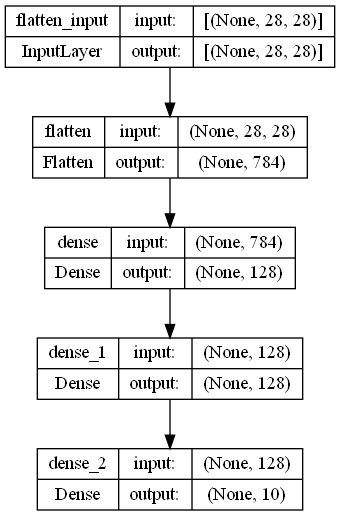

In [10]:
# plot the model graph

plot_model(kr_model, to_file="model_plot.png", show_shapes=True, show_layer_names=True)

### Save the model

In [11]:
# Saving model 
kr_model.save("kr_N_model.h5")

### Make predictions with model

In [12]:
# predict example for index 1
predictions = kr_model.predict([x_test])
print("The predicted number at index 1 is", np.argmax(predictions[1]))

313/313 [==============================] - 1s 4ms/step
The predicted number at index 1 is 2


### Print actual value at index position 1

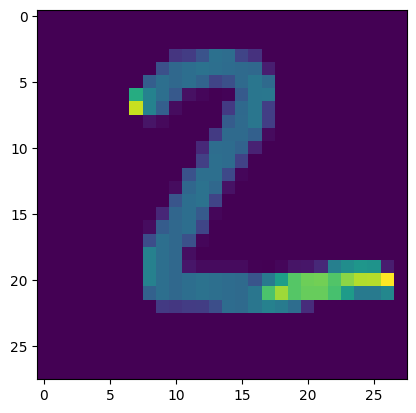

In [13]:
#print the actual value at that index 1
plt.imshow(x_test[1])
plt.show()